In [1]:
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_data(n=2000, n_features=3):
  torch.set_deterministic(True)
  torch.manual_seed(42)
  np.random.seed(42)
  xx = torch.linspace(-math.pi, math.pi, n)
  x = xx.unsqueeze(-1).pow(torch.tensor(range(1, n_features+1)))
  y = torch.sin(xx)
  return x, y

def poly3():
  return nn.Sequential(nn.Linear(3, 1), nn.Flatten(0, 1))

def train_sgd(max_epochs=500):
  epochs_loss = []
  
  for _ in range(max_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    epochs_loss += [loss.item()]
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
      for param in model.parameters():
        param -= 1e-6 * param.grad

  plt.plot(epochs_loss)

/usr/local/lib/python3.7/dist-packages/torch/__init__.py:422: UserWarning: torch.set_deterministic is deprecated and will be removed in a future release. Please use torch.use_deterministic_algorithms instead
  "torch.set_deterministic is deprecated and will be removed in a future "


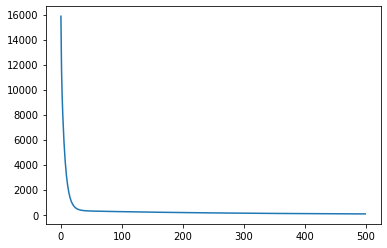

In [3]:
x, y = generate_data()
model = poly3()
criterion = nn.MSELoss(reduction='sum')
train_sgd()

In [4]:
def train_optimizer(max_epochs=500):
  epochs_loss = []
  for _ in range(max_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    epochs_loss += [loss.item()]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  plt.plot(epochs_loss)

/usr/local/lib/python3.7/dist-packages/torch/__init__.py:422: UserWarning: torch.set_deterministic is deprecated and will be removed in a future release. Please use torch.use_deterministic_algorithms instead
  "torch.set_deterministic is deprecated and will be removed in a future "


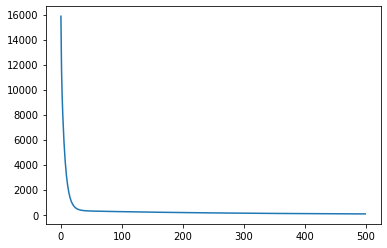

In [5]:
x, y = generate_data()
model = poly3()
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
train_optimizer()

In [6]:
def linear_regression(degree=3):
  return nn.Sequential(
      nn.Linear(degree, 1),
      nn.Flatten(0, 1)
  )

def logistic_regression(degree=3):
  return nn.Sequential(
      nn.Linear(degree, 1),
      nn.Sigmoid()
  )

class LinearRegression(nn.Module):
  def __init__(self, input_size=3):
    super(LinearRegression, self).__init__()
    self.input_layer = nn.Linear(input_size, 1)
    self.classifier = nn.Flatten(0, 1)
  
  def forward(self, x):
    x = self.input_layer(x)
    x = self.classifier(x)
    return x

class MLP(nn.Module):
  def __init__(self, input_size=3, hidden_layer_size=1, output_size=1):
    super(MLP, self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_layer_size)
    self.input_layer.weight.data.uniform_()
    self.input_layer.bias.data.zero_()
    self.hidden_layer = nn.Linear(hidden_layer_size, hidden_layer_size)
    self.classifier = nn.Linear(hidden_layer_size, output_size)
  
  def forward(self, x):
    x = F.relu(self.input_layer(x))
    #x = F.relu(self.hidden_layer(x))
    #x = torch.flatten(self.classifier(x), 0, 1)
    return x

/usr/local/lib/python3.7/dist-packages/torch/__init__.py:422: UserWarning: torch.set_deterministic is deprecated and will be removed in a future release. Please use torch.use_deterministic_algorithms instead
  "torch.set_deterministic is deprecated and will be removed in a future "


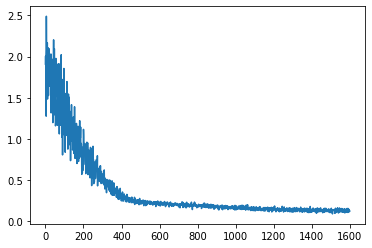

In [7]:
x, y = generate_data()
d = torch.utils.data.TensorDataset(x, y)
dl = torch.utils.data.DataLoader(d, batch_size=128, shuffle=True)
model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

to_plot = []
for epoch in range(100):
  for (inputs, target) in dl:
    pred = torch.flatten(model(inputs), 0, 1)
    loss = F.smooth_l1_loss(pred, target)
    to_plot += [loss.item()]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(to_plot)

/usr/local/lib/python3.7/dist-packages/torch/__init__.py:422: UserWarning: torch.set_deterministic is deprecated and will be removed in a future release. Please use torch.use_deterministic_algorithms instead
  "torch.set_deterministic is deprecated and will be removed in a future "


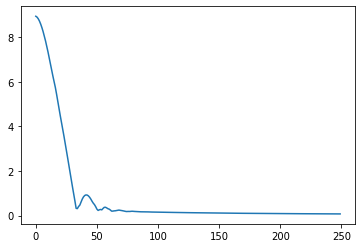

In [8]:
x, y = generate_data(n_features=5)
model = linear_regression(5)
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
train_optimizer(250)

In [9]:
print(model[0].bias.item())
print(model[0].weight)

0.027986716479063034
Parameter containing:
tensor([[ 0.4116,  0.2114,  0.0243, -0.0281, -0.0073]], requires_grad=True)


In [10]:
t = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
t1 = torch.flatten(t, 0, -1)
t2 = torch.flatten(t, 1, -1)
t3 = torch.flatten(t, 0, 1)
print(t.size(), t1.size(), t2.size(), t3.size())
t3

torch.Size([2, 2, 2]) torch.Size([8]) torch.Size([2, 4]) torch.Size([4, 2])


tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])